# Convolution

In this notebook, we'll simply implement a CNN.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

2024-07-06 10:09:34.070034: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-06 10:09:34.400497: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-06 10:09:35.408489: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Download CIFAR-10 database:

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

classes = ['Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

Plot some samples:

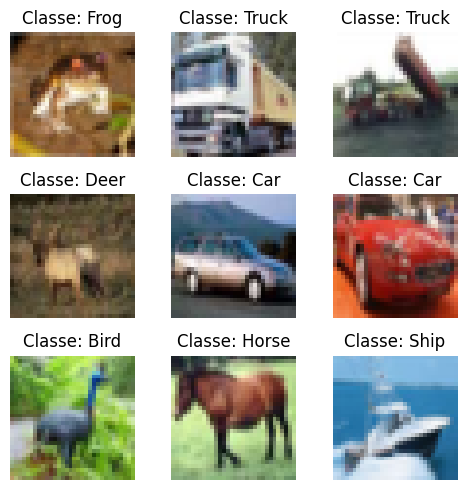

In [4]:
fig, axs = plt.subplots(3, 3, figsize=(5, 5))

for i, ax in enumerate(axs.flat):
    image = x_train[i]
    label = y_train[i][0]
    
    ax.imshow(image)
    ax.axis('off')
    ax.set_title('Classe: ' + classes[label])

plt.tight_layout()
plt.show()

Prepare data:

In [5]:
# Normalize pixel values between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert the labels to vectors (indicator function)
# This conversion is necessary for the neural network to
# compare the network's output with the image label
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

Define CNN arquiteture:

In [57]:
def cnn_model(num_layers = 2):

    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu'))

    for _ in range(num_layers):
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))

    model.add(Dense(10, activation='softmax')) #output layer

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

model = cnn_model()
model.summary() 

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_21 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 15, 15, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 7, 7, 16)         

## Train the model:

In [27]:
# Treinar o modelo
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


2024-06-14 11:32:36.900129: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2024-06-14 11:32:37.600788: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-06-14 11:32:38.534892: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0xa349900 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-14 11:32:38.534952: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-06-14 11:32:38.657615: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-14 11:32:39.137012: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of

782/782 [==============================] - 12s 9ms/step - loss: 1.4916 - accuracy: 0.4595 - val_loss: 1.2343 - val_accuracy: 0.5582
Epoch 2/10
782/782 [==============================] - 6s 8ms/step - loss: 1.1057 - accuracy: 0.6089 - val_loss: 1.0564 - val_accuracy: 0.6272
Epoch 3/10
782/782 [==============================] - 7s 9ms/step - loss: 0.9225 - accuracy: 0.6773 - val_loss: 0.9509 - val_accuracy: 0.6684
Epoch 4/10
782/782 [==============================] - 7s 9ms/step - loss: 0.7918 - accuracy: 0.7234 - val_loss: 0.8290 - val_accuracy: 0.7087
Epoch 5/10
782/782 [==============================] - 7s 8ms/step - loss: 0.6844 - accuracy: 0.7606 - val_loss: 0.8061 - val_accuracy: 0.7230
Epoch 6/10
782/782 [==============================] - 6s 8ms/step - loss: 0.5928 - accuracy: 0.7910 - val_loss: 0.7950 - val_accuracy: 0.7297
Epoch 7/10
782/782 [==============================] - 6s 8ms/step - loss: 0.5078 - accuracy: 0.8202 - val_loss: 0.8538 - val_accuracy: 0.7148
Epoch 8/10
782/7

**Training** metrics with 10 epochs and BS = 64: 

- loss: 0.2732 
- accuracy: 0.9035 
- val_loss: 1.0885 
- val_accuracy: 0.7104

 **Test** metrics:

In [28]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

313/313 [==============================] - 2s 4ms/step - loss: 1.0885 - accuracy: 0.7104
Test Loss: 1.0885
Test Accuracy: 0.7104


## Classification

Check how the model performs with data outside of CIFAR-10:

1/1 [==============================] - 0s 21ms/step

previsoes:  [[6.7593582e-04 4.1300902e-07 5.6262431e-04 4.9273212e-02 2.1748716e-05
  9.4698894e-01 1.6229469e-04 1.5388908e-03 6.8429788e-04 9.1624992e-05]]
Predicted class: 5
1/1 [==============================] - 0s 20ms/step

previsoes:  [[2.6303795e-04 4.5582661e-04 1.9331548e-03 1.4685640e-01 1.3833069e-05
  7.5955099e-01 1.5528595e-04 6.9495074e-02 8.3227893e-03 1.2953597e-02]]
Predicted class: 5


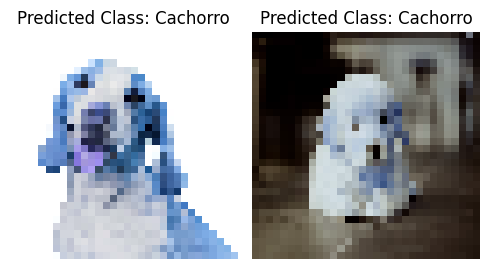

In [51]:
im_nova = cv2.imread('cachorro1.png')
im_normalizado = im_nova / 255.0
nova_entrada = np.expand_dims(im_normalizado, axis=0)

previsoes = model.predict(nova_entrada)
predicted_class = np.argmax(previsoes)

print("\nprevisoes: ", previsoes)
print(f"Predicted class: {predicted_class}")


#imagem 2
im_nova2 = cv2.imread('cachorro2.png')
im_normalizado2 = im_nova2 / 255.0
nova_entrada2 = np.expand_dims(im_normalizado2, axis=0)

previsoes2 = model.predict(nova_entrada2)
predicted_class2 = np.argmax(previsoes2)

print("\nprevisoes: ", previsoes2)
print(f"Predicted class: {predicted_class2}")

fig, axs = plt.subplots(ncols=2, figsize=(5, 5))

axs[0].imshow(im_nova)
axs[0].axis('off')
axs[0].set_title('Predicted Class: ' + classes[predicted_class])

axs[1].imshow(im_nova2)
axs[1].axis('off')
axs[1].set_title('Predicted Class: ' + classes[predicted_class2])

plt.tight_layout()
plt.show()

## Visualize Convolutions







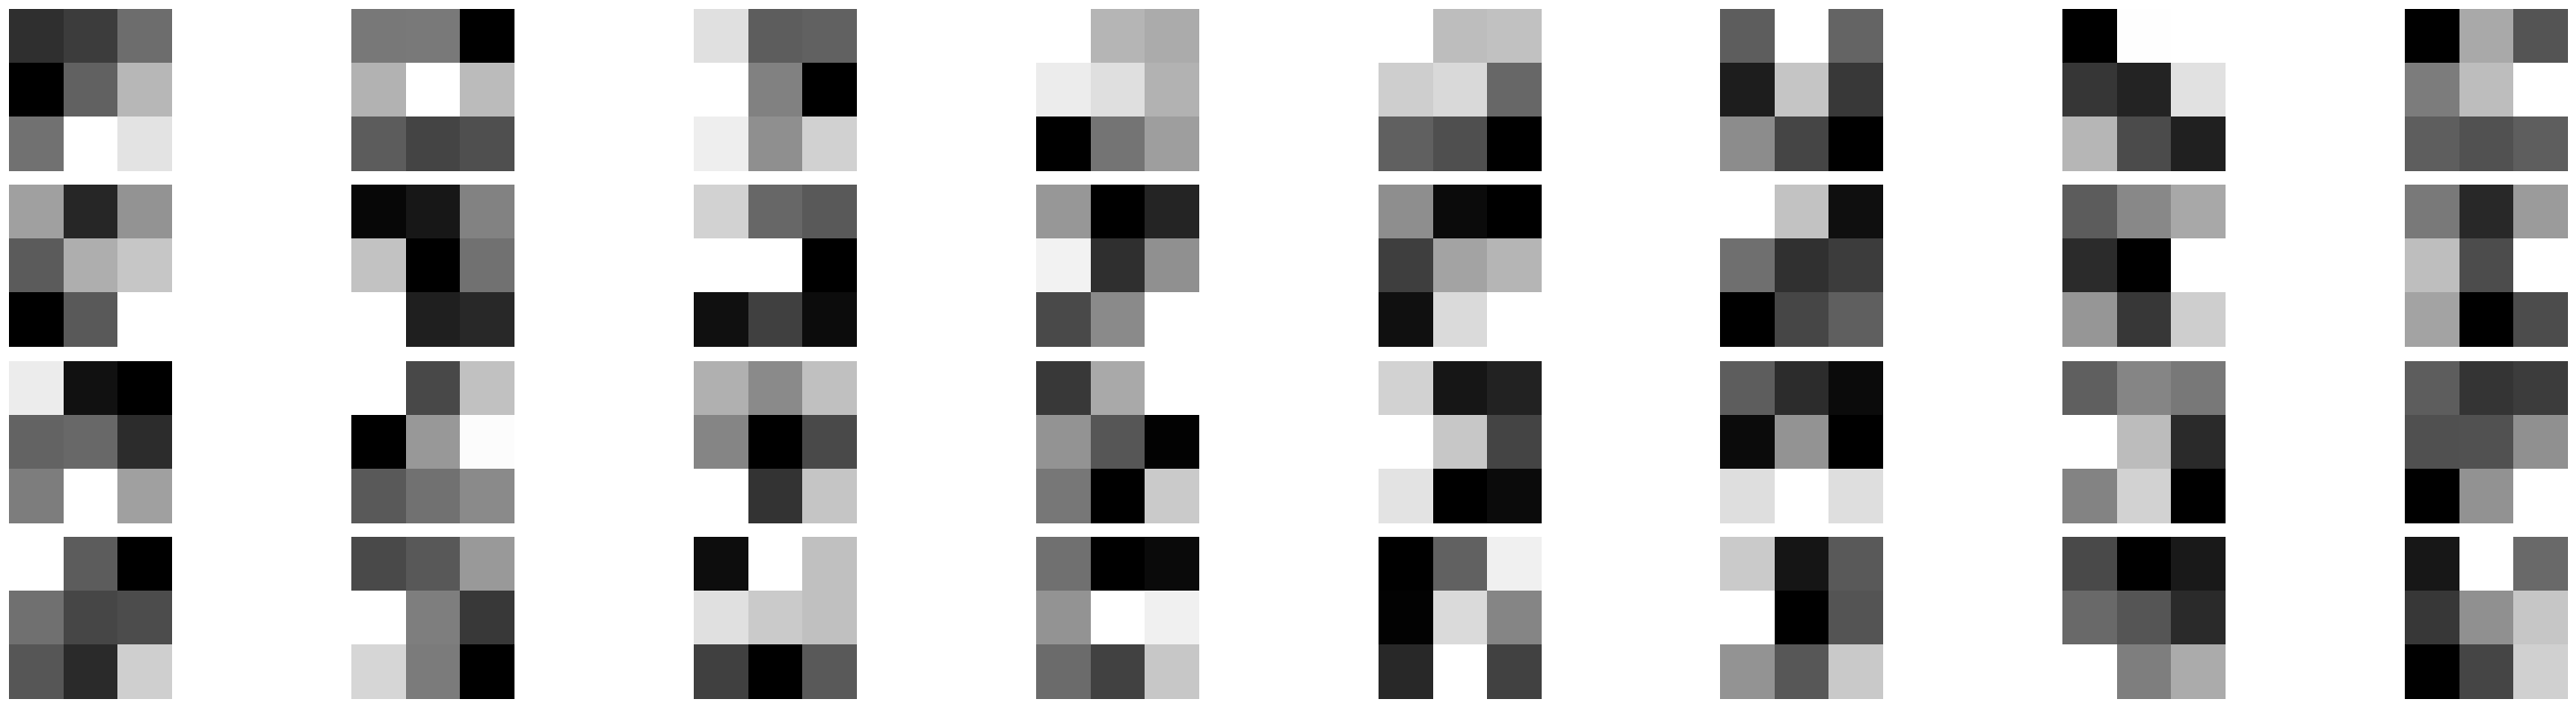

In [53]:
# visualizar os filtros da primeira camada
pesos_primeira_camada = model.layers[0].get_weights()[0]
#use a função get_weights() para obter os pesos da primeira camada

# Normalização dos pesos para valores entre 0 e 255
pesos_normalizados = (pesos_primeira_camada - np.min(pesos_primeira_camada)) / (np.max(pesos_primeira_camada) - np.min(pesos_primeira_camada))
pesos_normalizados *= 255

num_linhas = 4
num_colunas = 8

# Cria a figura e os subplots
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(32, 8))

# Percorre as imagens e exibe em cada subplot
for i in range(32):
    ax = axs[i // num_colunas, i % num_colunas]  # obtém o subplot correto
    filtro = pesos_normalizados[:, :, :, i]
    filtro_img = np.reshape(filtro, (3, 3, 3))
    # imagem em tons de cinza
    filtro_pb = cv2.cvtColor(filtro_img, cv2.COLOR_BGR2GRAY)
    filtro_pb = filtro_pb.astype(np.uint8)
    ax.imshow(filtro_pb, cmap='gray')  # exibe a imagem
    ax.axis('off')  # remove os eixos

plt.tight_layout()
plt.show()